In [2]:
%matplotlib inline

import os
import yaml

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import astropy.io.fits as pyfits
from astropy.io import fits
from astropy.table import Table

import grizli
import grizli.catalog
from grizli import utils

import pandas as pd
import eazy

print(f'grizli version: {grizli.__version__}')
print(f'eazy-py version: {eazy.__version__}')

Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git
grizli version: 1.11.2
eazy-py version: 0.6.8


### Set field & path
`abell2744clu` = Abell 2744 GLASS + UNCOVER + DD-2756

`gds` = GOODS-South

In [3]:
field = 'gds-grizli-v7.0' 
url_path = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7'

In [4]:
phot = utils.read_catalog(f'{url_path}/{field}_phot.fits')

In [5]:
import eazy.hdf5

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()

root = f'{field}-fix'

self = eazy.hdf5.initialize_from_hdf5(h5file=root+'.eazypy.h5')
self.fit_phoenix_stars()

zout = utils.read_catalog(root+'.eazypy.zout.fits')
self.cat = utils.read_catalog(root+'_phot_apcorr.fits')
cat = self.cat

Read default param file: /home/codespace/.python/current/lib/python3.10/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 52427
f090w_tot_1 f090w_etot_1 (363): jwst_nircam_f090w
f105w_tot_1 f105w_etot_1 (202): hst/wfc3/IR/f105w.dat
f110w_tot_1 f110w_etot_1 (241): hst/wfc3/IR/f110w.dat
f115w_tot_1 f115w_etot_1 (364): jwst_nircam_f115w
f115wn_tot_1 f115wn_etot_1 (309): niriss-f115w
f125w_tot_1 f125w_etot_1 (203): hst/wfc3/IR/f125w.dat
f140w_tot_1 f140w_etot_1 (204): hst/wfc3/IR/f140w.dat
f150w_tot_1 f150w_etot_1 (365): jwst_nircam_f150w
f150wn_tot_1 f150wn_etot_1 (310): niriss-f150w
f160w_tot_1 f160w_etot_1 (205): hst/wfc3/IR/f160w.dat
f182m_tot_1 f182m_etot_1 (370): jwst_nircam_f182m
f200w_tot_1 f200w_etot_1 (366): jwst_nircam_f200w
f200wn_tot_1 f200wn_etot_1 (311): niriss-f200w
f210m_tot_1 f210m_etot_1 (371): jwst_nircam_f210m
f277w_tot_1 f277w_etot_1 (375): jwst_nircam_f277w
f335m_tot_1 f335m_etot_1 (381): jwst_nircam_f335m
f356w_tot_1 f356w_etot_1 (376

294it [00:04, 67.82it/s]


h5: read corr_sfhz_13_bin0_av0.01.fits
h5: read corr_sfhz_13_bin0_av0.25.fits
h5: read corr_sfhz_13_bin0_av0.50.fits
h5: read corr_sfhz_13_bin0_av1.00.fits
h5: read corr_sfhz_13_bin1_av0.01.fits
h5: read corr_sfhz_13_bin1_av0.25.fits
h5: read corr_sfhz_13_bin1_av0.50.fits
h5: read corr_sfhz_13_bin1_av1.00.fits
h5: read corr_sfhz_13_bin2_av0.01.fits
h5: read corr_sfhz_13_bin2_av0.50.fits
h5: read corr_sfhz_13_bin2_av1.00.fits
h5: read corr_sfhz_13_bin3_av0.01.fits
h5: read corr_sfhz_13_bin3_av0.50.fits
h5: read fsps_4590.fits
h5: read j0647agn+torus.fits
fit_best: 22.4 s (n_proc=2,  NOBJ=51146)
phoenix_templates: ./bt-settl_t400-7000_g4.5.fits


Text(0.5, 1.0, 'JWST gds-grizli-v7.0')

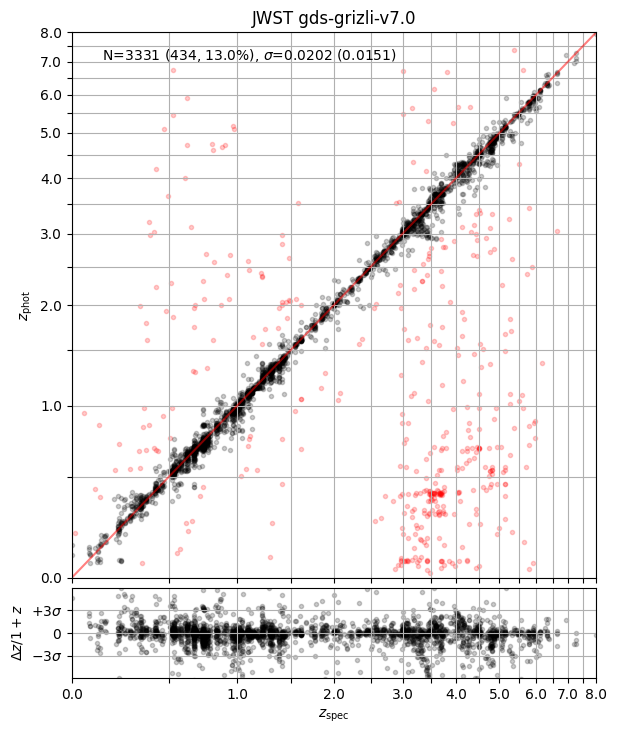

In [6]:
fig = eazy.utils.zphot_zspec(zout['z_phot'], zout['z_spec'], zmax=8)
fig.axes[0].set_title(f'JWST {field}')

(0.0, 8.0)

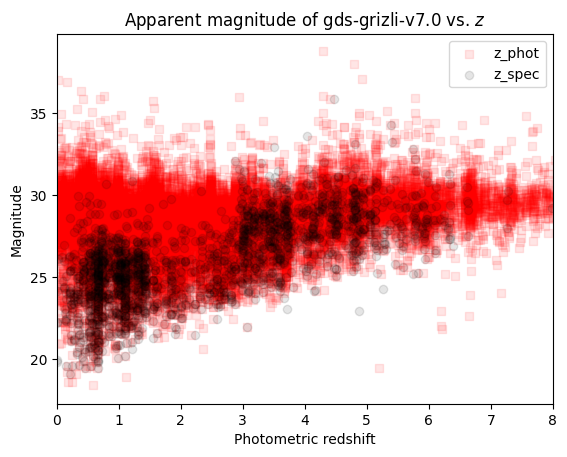

In [7]:
mag_f200 = 23.9 - 2.5*np.log10(phot['f200w-clear_flux_aper_2']) # apparent magnitude using zero point of 23.9

plt.scatter(zout['z_phot'], mag_f200, marker='s', alpha=0.1, label='z_phot', color='red')
plt.scatter(zout['z_spec'], mag_f200, marker='o', alpha=0.1, label='z_spec', color='black')
plt.legend()
plt.ylabel('Magnitude'); plt.xlabel('Photometric redshift'); plt.title(f'Apparent magnitude of {field} vs. $z$')
plt.xlim(0, 8)

In [9]:
np.mean(zout['z_phot'])

2.7583258

Text(0.5, 1.0, 'Photometric redshift distribution - GDS')

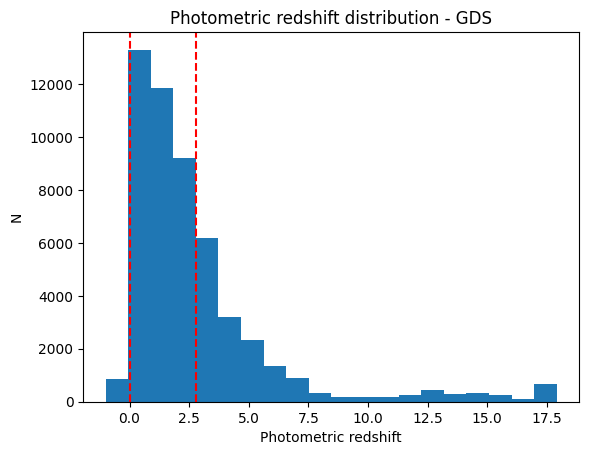

In [13]:
plt.hist(zout['z_phot'], bins=20)
plt.axvline(0, linestyle='--', color='red')
plt.axvline(2.8, linestyle='--', color='red')
plt.xlabel('Photometric redshift'); plt.ylabel('N'); plt.title('Photometric redshift distribution - GDS')
## mean at z ~ 2.7, most 1 < z < 2.5
## Likelihood that a particular galaxy is a cluster member -> galaxies < 0 and > 7.5 are foreground/background objects?

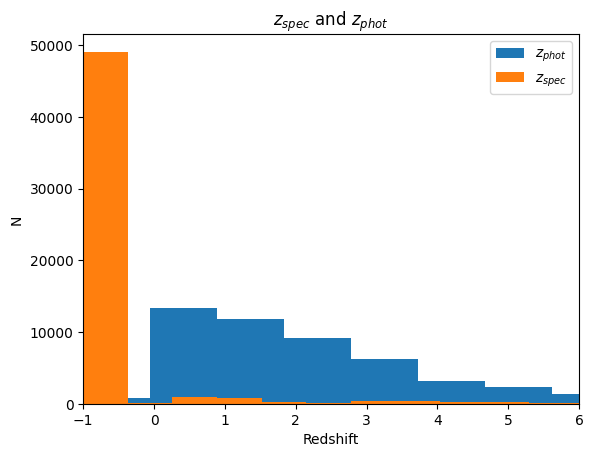

In [14]:
plt.hist(zout['z_phot'], bins=20, label='$z_{phot}$')
plt.hist(zout['z_spec'], bins=20, label='$z_{spec}$') ## why at -1??
plt.xlim(-1,6); plt.xlabel('Redshift'); plt.ylabel('N')
plt.title('$z_{spec}$ and $z_{phot}$')

plt.legend()

## Colour-colour diagrams

In [12]:
_rf = self.rest_frame_fluxes()

Rest-frame filters:
~~~~~~~~~~~~~~~~~~~ 
   0 REST_FRAME/maiz-apellaniz_Johnson_U.res 2006AJ....131.1184M lambda_c= 3.5900e+03 AB-Vega= 0.769 w95=862.3
   1 REST_FRAME/maiz-apellaniz_Johnson_B.res 2006AJ....131.1184M lambda_c= 4.3722e+03 AB-Vega=-0.106 w95=1321.3
   2 REST_FRAME/maiz-apellaniz_Johnson_V.res 2006AJ....131.1184M lambda_c= 5.4794e+03 AB-Vega= 0.002 w95=1369.1
   3 2MASS/J.res lambda_c= 1.2358e+04 AB-Vega= 0.885 w95=2311.1


100%|██████████| 6/6 [10:20<00:00, 103.46s/it]

 ... rest-frame flux: 620.9 s (n_proc=2,  NOBJ=51560)


In [13]:
"""
_rf = (tf,lc,rf)
tf = rf integrated template fluxes (total through a filter)
lc = rf pivot wavelengths (effective wavelength based on filter's transmission properties)
rf = rf fluxes 
"""

_ubvj = _rf
UBVJ = [153,154,155,161]
self.ubvj_tempfilt, self.ubvj_lc, self.ubvj = _ubvj
self.ubvj_f_numbers = UBVJ
        
restU = self.ubvj[:,0,2] # flux density
restB = self.ubvj[:,1,2]
restV = self.ubvj[:,2,2]
restJ = self.ubvj[:,3,2]

UV = -2.5*np.log10(restU/restV) # rest-frame with AB magnitude
VJ = -2.5*np.log10(restV/restJ) 


In [16]:
# Creating a master dataframe of (z, U, V, J) in order to index by redshift
colour_df = pd.DataFrame()

colour_df['z_phot'] = list(zout['z_phot'])
colour_df['U'] = list(restU)
colour_df['V'] = list(restV)
colour_df['J'] = list(restJ)

colour_df.sort_values('z_phot')

,z_phot,U,V,J
0,-1.000000,-99.0,-99.0,-99.0
31943,-1.000000,-99.0,-99.0,-99.0
49909,-1.000000,-99.0,-99.0,-99.0
32001,-1.000000,-99.0,-99.0,-99.0
7181,-1.000000,-99.0,-99.0,-99.0
...,...,...,...,...
43792,17.914907,0.0,0.0,0.0
34503,17.914907,0.0,0.0,0.0
36748,17.914907,0.0,0.0,0.0
42776,17.914907,0.0,0.0,0.0


In [17]:
def UVJ_diagram(df):
    """ For a given dataframe of shape (z, U, V, J), return the minimum
        and maximum z and UV and VJ bands
    """
    min_z = min(df['z_phot'])
    max_z = max(df['z_phot'])
    UV = -2.5*np.log10(df['U']/df['V'])
    VJ = -2.5*np.log10(df['V']/df['J'])
    
    return min_z, max_z, VJ, UV

In [43]:
# Creating dataframes for different ranges of redshift
z1 = colour_df[(colour_df['z_phot'] >= 0) & (colour_df['z_phot'] <= 0.6)]
z2 = colour_df[(colour_df['z_phot'] > 0.6) & (colour_df['z_phot'] <= 1.2)]
z3 = colour_df[(colour_df['z_phot'] > 1.2) & (colour_df['z_phot'] <= 1.95)]
z4 = colour_df[(colour_df['z_phot'] > 1.95) & (colour_df['z_phot'] <= 2.85)]
z5 = colour_df[(colour_df['z_phot'] > 2.85) & (colour_df['z_phot'] <= 4.5)]
z6 = colour_df[(colour_df['z_phot'] > 4.5) & (colour_df['z_phot'] <= 18)]

zs=[z1,z2,z3,z4,z5, z6]

for z in zs:
    print(len(z))

8729
8800
8620
8533
8464
8414


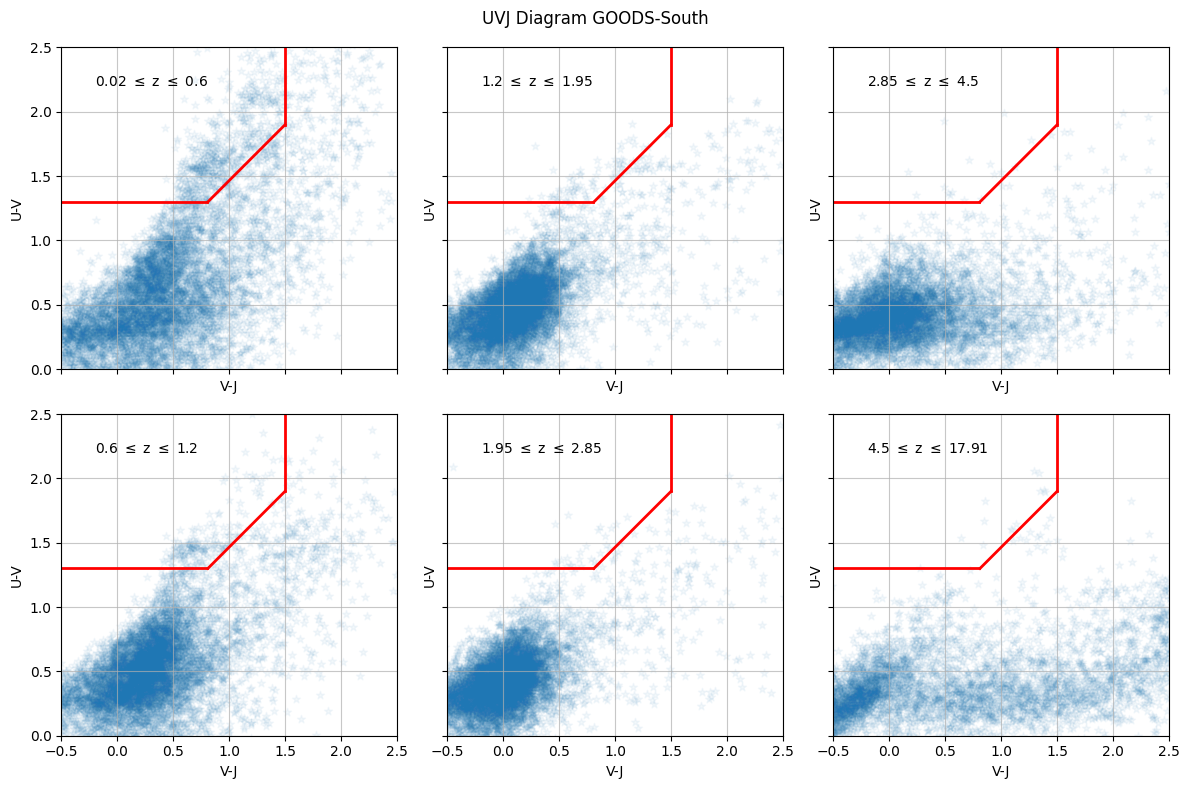

In [45]:
# Subplots for each range of z
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('UVJ Diagram GOODS-South')
zs=[z1,z2,z3,z4,z5, z6]

for i, variable in enumerate(zs):
    y = i//2; x = i%2 

    axs[x,y].scatter(UVJ_diagram(zs[i])[2], UVJ_diagram(zs[i])[3], alpha=0.05, marker='*') 
    axs[x,y].set_xlim(-0.5, 2.5); axs[x,y].set_ylim(0, 2.5)
    axs[x,y].text(-0.2, 2.2, str(round(UVJ_diagram(zs[i])[0], 2))+' $\leq$ z $\leq$ '+str(round(UVJ_diagram(zs[i])[1], 2)),fontsize=10)
    axs[x,y].set_xlabel('V-J')
    axs[x,y].set_ylabel('U-V')  

    axs[x,y].grid(alpha=0.7)

    axs[x,y].plot([-0.5,0.8],[1.3,1.3],'r',lw=2) # left
    axs[x,y].plot([0.81,1.5],[1.3,1.9],'r',lw=2) # diag
    axs[x,y].plot([1.5,1.5],[1.9,2.5],'r',lw=2) # top

plt.tight_layout()
plt.show()